<a href="https://colab.research.google.com/github/Anny8910/Decision-Tree-Classification-on-Diabetes-Dataset/blob/master/Diabetes_set_(Decision_tree).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot


In [2]:
url = 'https://raw.githubusercontent.com/webshredder/CS7641-Assigment1/main/winequalityN.csv'
df = pd.read_csv(url,on_bad_lines='skip')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
#feature variables
x=df.drop(['quality'], axis=1)
#target variable
y=df.quality

In [4]:
# Import AdaBoostClassifier etc.
from sklearn.tree import DecisionTreeClassifier  # Import Decision Tree Classifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.model_selection import cross_val_score


In [38]:
# Split the dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3, stratify=y)

In [49]:
train_acc = []
test_acc = []
all_acc = []
train_err = []
test_err = []
all_err = []
n_est = []

for i in range(1, 40):
   # Create AdaBoost classifer object with DecisionTreeClassifier(max_depth)
   model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3), n_estimators=i, learning_rate=0.1)

   # Train Decision Tree Classifer
   model = model.fit(x_train,y_train)
   #Predict the response for test dataset
   y_train_pred = model.predict(x_train)
   #Predict the response for test datasets
   y_test_pred = model.predict(x_test)
   #For full data set
   y_all_pred = model.predict(x)

   train_acc.append(metrics.accuracy_score(y_train, y_train_pred))
   test_acc.append(metrics.accuracy_score(y_test, y_test_pred))
   all_acc.append(metrics.accuracy_score(y, y_all_pred))
   train_err.append(1-train_acc[i-1])
   test_err.append(1-test_acc[i-1])
   all_err.append(1-all_acc[i-1])
   n_est.append(i)





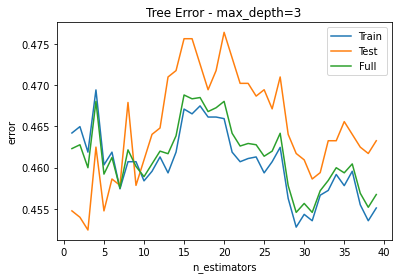

In [50]:
#plot results vs tree depth
pyplot.plot(n_est, train_err, label='Train')
pyplot.plot(n_est, test_err, label='Test')
pyplot.plot(n_est, all_err, label='Full')
pyplot.title('Tree Error - max_depth=3')
pyplot.ylabel('error')
pyplot.xlabel('n_estimators')
pyplot.legend()
pyplot.show()

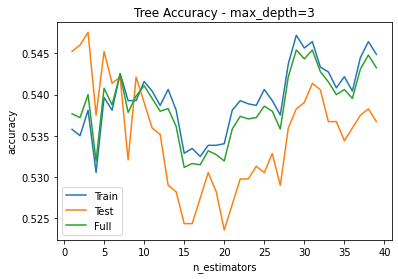

In [51]:
#plot results vs tree depth
pyplot.plot(n_est, train_acc, label='Train')
pyplot.plot(n_est, test_acc, label='Test')
pyplot.plot(n_est, all_acc, label='Full')
pyplot.title('Tree Accuracy - max_depth=3')
pyplot.ylabel('accuracy')
pyplot.xlabel('n_estimators')
pyplot.legend()
pyplot.show()